---

title: "Dirichlet 过程"
date: 2024-12-11T08:00:00-06:00
author: 郝鸿涛
slug: dp
draft: false
toc: false
tags: 统计
---

[Dirichlet 过程](https://en.wikipedia.org/wiki/Dirichlet_process)与 [中餐馆过程](/cn/2024/11/27/crp/) 类似。区别是 Dirichlet 过程中，每张桌子上有一道菜。一位新顾客如果选择加入已有的桌子，则只能吃桌子上已有的菜。如果选择新开一张桌子，要从「菜单」中选一道菜。这个菜单被称为「基分布 (Base Distribution) $G_0$」。一个例子是，$G_0$ 为正态分布。

我们用 $G_0 \sim \mathcal{N} (0, 1)$ 来模拟一下：

In [46]:
import numpy as np 
import matplotlib.pyplot as plt 
from collections import Counter

def dp_restaurant(n, alpha, mean, std):
    """
    n: total number of customers
    alpha: parameter of crp
    mean: mean of G0 if it is a normal distribution
    std: standard deviation of G0 if it is a normal distribution
    """
    tables = []
    table_dishes = []

    for i in range(n):
        if i == 0:
            tables.append(1)
            table_dishes.append(np.random.normal(mean, std))
        else:
            choices = np.arange(1, max(tables)+2)
            n_k = np.bincount(tables)[1:]
            probs = list(n_k/(i+alpha)) + [alpha/(i+alpha)]

            # assign customer to a table
            choice = np.random.choice(choices, p=probs)
            tables.append(choice)

            # if new table, sample a new dish
            if choice == choices[-1]:
                table_dishes.append(np.random.normal(mean, std))
    return tables, table_dishes

In [47]:
# Set random seed for reproducibility
np.random.seed(42)
tables, table_dishes = dp_restaurant(100, 1.2, 0, 1)

In [48]:
Counter(tables)

Counter({1: 72, 2: 12, 3: 2, 4: 9, 5: 4, 6: 1})

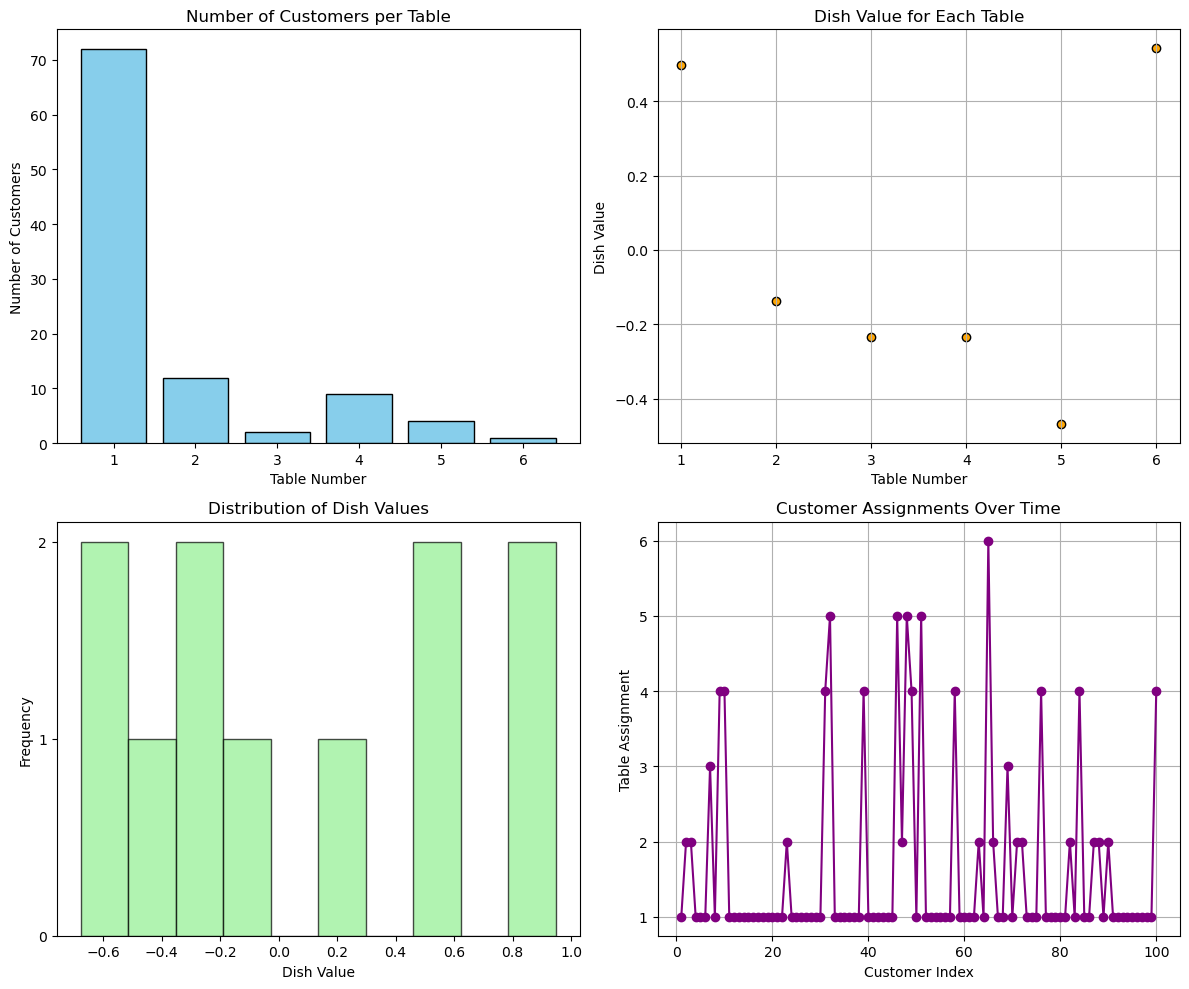

In [49]:
#| code-fold:true

def visualize_results(tables, table_dishes):
    unique_tables, counts = np.unique(tables, return_counts=True)

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Plot 1: Customers per Table
    axs[0, 0].bar(unique_tables, counts, color="skyblue", edgecolor="black")
    axs[0, 0].set_title("Number of Customers per Table")
    axs[0, 0].set_xlabel("Table Number")
    axs[0, 0].set_ylabel("Number of Customers")
    axs[0, 0].set_xticks(unique_tables)

    # Plot 2: Table Dishes
    dic = dict(zip(np.unique(tables), table_dishes))
    # Extract keys (table numbers) and values (dishes)
    table_numbers = list(dic.keys())
    dish_values = list(dic.values())
    axs[0, 1].scatter(table_numbers, dish_values, color="orange", edgecolor="black")
    axs[0, 1].set_title("Dish Value for Each Table")
    axs[0, 1].set_xlabel("Table Number")
    axs[0, 1].set_ylabel("Dish Value")
    axs[0, 1].grid(True)

    # Plot 3: Dish Distribution
    axs[1, 0].hist(table_dishes, bins=10, color="lightgreen", edgecolor="black", alpha=0.7)
    axs[1, 0].set_title("Distribution of Dish Values")
    axs[1, 0].set_xlabel("Dish Value")
    axs[1, 0].set_ylabel("Frequency")
    # Set y-axis ticks to discrete values (0, 1, 2, ...)
    max_frequency = max(np.histogram(table_dishes, bins=10)[0])  # Get max frequency from histogram
    axs[1, 0].set_yticks(range(0, max_frequency + 1)) 

    # Plot 4: Customer Assignments Over Time
    axs[1, 1].plot(range(1, len(tables) + 1), tables, marker="o", linestyle="-", color="purple")
    axs[1, 1].set_title("Customer Assignments Over Time")
    axs[1, 1].set_xlabel("Customer Index")
    axs[1, 1].set_ylabel("Table Assignment")
    axs[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

# Example Usage
visualize_results(tables, dishes)